In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("owid-covid-data (1).csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383715,ZWE,Africa,Zimbabwe,2024-02-28,266355.0,0.0,0.714,5739.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
383716,ZWE,Africa,Zimbabwe,2024-02-29,266355.0,0.0,0.714,5739.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
383717,ZWE,Africa,Zimbabwe,2024-03-01,266355.0,0.0,0.714,5739.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
383718,ZWE,Africa,Zimbabwe,2024-03-02,266355.0,0.0,0.714,5739.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [6]:
df = df.fillna(0)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0


In [7]:
df = df[df['continent'] != 0]

pd.set_option('display.float_format', '{:.2f}'.format)
grouped_cases = df.groupby(['continent', 'location'])[['total_cases']].sum()

grouped_cases

total_cases
continent     location                  
Africa        Algeria       279536807.00
              Angola         97898727.00
              Benin          26857587.00
              Botswana      291162889.00
              Burkina Faso   22448282.00
...                                  ...
South America Paraguay      689718886.00
              Peru         4101265718.00
              Suriname       73588621.00
              Uruguay       868351130.00
              Venezuela     537465694.00

[243 rows x 1 columns]

In [8]:
# pivot table for vaccination rates by country
vaccination_rates_by_country = pd.pivot_table(
    data=df,
    values=['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'],
    index='location',  # Use only country as the index
    aggfunc='max'  # Assuming you want the latest (maximum) value recorded for each country
)

vaccination_rates_by_country


,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred
location,,
Afghanistan,44.05,45.95
Albania,45.01,47.47
Algeria,14.43,17.46
American Samoa,0.00,0.00
Andorra,67.01,72.53
...,...,...
Wallis and Futuna,58.67,61.66
Western Sahara,0.00,0.00
Yemen,2.39,3.12


In [9]:
# pivot table for COVID-19 cases and deaths by country
cases_deaths_by_country = pd.pivot_table(
    data=df,
    values=['total_cases_per_million', 'total_deaths_per_million'],
    index='location',  # Use country as the index
    aggfunc='max'  # Assuming you want the latest (maximum) value recorded for each country
)

cases_deaths_by_country


,total_cases_per_million,total_deaths_per_million
location,,
Afghanistan,5640.58,194.07
Albania,117813.35,1268.33
Algeria,6057.69,153.24
American Samoa,188712.04,767.58
Andorra,601367.68,1991.41
...,...,...
Wallis and Futuna,306140.05,689.89
Western Sahara,0.00,0.00
Yemen,354.49,64.07


In [10]:
# Create a pivot table for Handwashing Facilities and COVID-19 Cases by country
handwash_cases_by_country = pd.pivot_table(
    data=df,
    values=['handwashing_facilities', 'total_cases_per_million'],
    index='location',  # Use country as the index
    aggfunc={
        'handwashing_facilities': 'mean',  # Assuming this is relatively static
        'total_cases_per_million': 'max'  # Assuming you want the latest (maximum) value recorded for each country
    }
)

handwash_cases_by_country


,handwashing_facilities,total_cases_per_million
location,,
Afghanistan,37.75,5640.58
Albania,0.00,117813.35
Algeria,83.74,6057.69
American Samoa,0.00,188712.04
Andorra,0.00,601367.68
...,...,...
Wallis and Futuna,0.00,306140.05
Western Sahara,0.00,0.00
Yemen,49.54,354.49


In [11]:
# Create a pivot table for GDP per Capita and COVID-19 Cases by country
gdp_cases_by_country = pd.pivot_table(
    data=df,
    values=['gdp_per_capita', 'total_cases_per_million'],
    index='location',  # Use country as the index
    aggfunc={
        'gdp_per_capita': 'mean',  # Assuming this is relatively static
        'total_cases_per_million': 'max'  # To get the latest (maximum) value recorded for each country
    }
)

gdp_cases_by_country


,gdp_per_capita,total_cases_per_million
location,,
Afghanistan,1803.99,5640.58
Albania,11803.43,117813.35
Algeria,13913.84,6057.69
American Samoa,0.00,188712.04
Andorra,0.00,601367.68
...,...,...
Wallis and Futuna,0.00,306140.05
Western Sahara,0.00,0.00
Yemen,1479.15,354.49


In [12]:
df['date'] = pd.to_datetime(df['date'])

# Optionally, if you want the month name instead of the month number:
df['month'] = df['date'].dt.month_name()

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,month
0,AFG,Asia,Afghanistan,2020-01-05,0.00,0.00,0.00,0.00,0.00,0.00,...,37.75,0.50,64.83,0.51,41128772.00,0.00,0.00,0.00,0.00,January
1,AFG,Asia,Afghanistan,2020-01-06,0.00,0.00,0.00,0.00,0.00,0.00,...,37.75,0.50,64.83,0.51,41128772.00,0.00,0.00,0.00,0.00,January
2,AFG,Asia,Afghanistan,2020-01-07,0.00,0.00,0.00,0.00,0.00,0.00,...,37.75,0.50,64.83,0.51,41128772.00,0.00,0.00,0.00,0.00,January
3,AFG,Asia,Afghanistan,2020-01-08,0.00,0.00,0.00,0.00,0.00,0.00,...,37.75,0.50,64.83,0.51,41128772.00,0.00,0.00,0.00,0.00,January
4,AFG,Asia,Afghanistan,2020-01-09,0.00,0.00,0.00,0.00,0.00,0.00,...,37.75,0.50,64.83,0.51,41128772.00,0.00,0.00,0.00,0.00,January


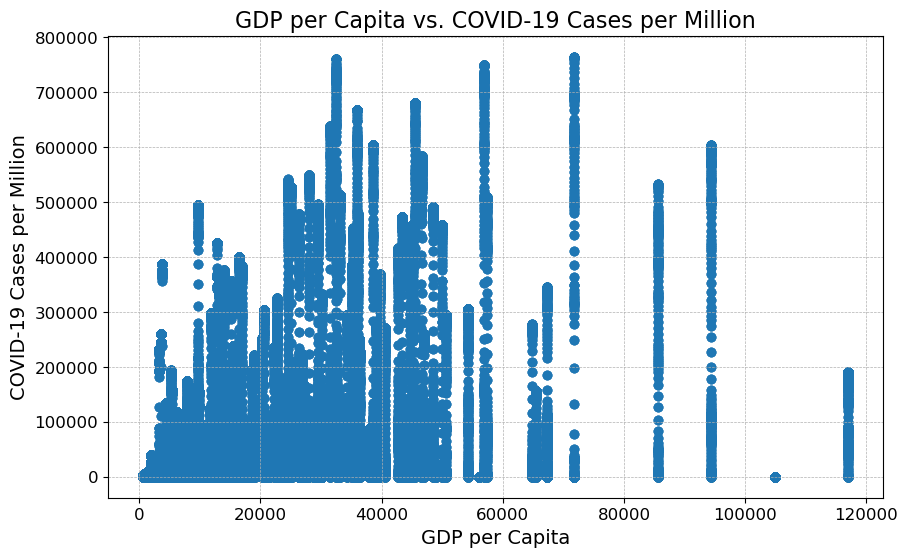

In [13]:
# Filter out rows where 'gdp_per_capita' is 0
df_gdp_nonzero = df[df['gdp_per_capita'] > 0]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_gdp_nonzero['gdp_per_capita'], df_gdp_nonzero['total_cases_per_million'], alpha=0.5)
plt.title('GDP per Capita vs. COVID-19 Cases per Million', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=14)
plt.ylabel('COVID-19 Cases per Million', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


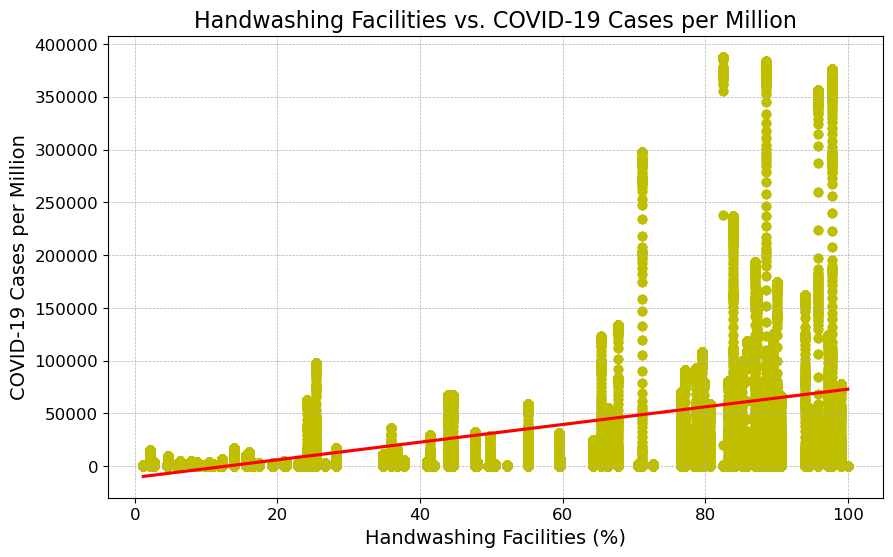

In [14]:
df_handwash_nonzero = df[df['handwashing_facilities'] > 0]

plt.figure(figsize=(10, 6))
sns.regplot(x='handwashing_facilities', y='total_cases_per_million', data=df_handwash_nonzero, color = 'y',
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Handwashing Facilities vs. COVID-19 Cases per Million', fontsize=16)
plt.xlabel('Handwashing Facilities (%)', fontsize=14)
plt.ylabel('COVID-19 Cases per Million', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


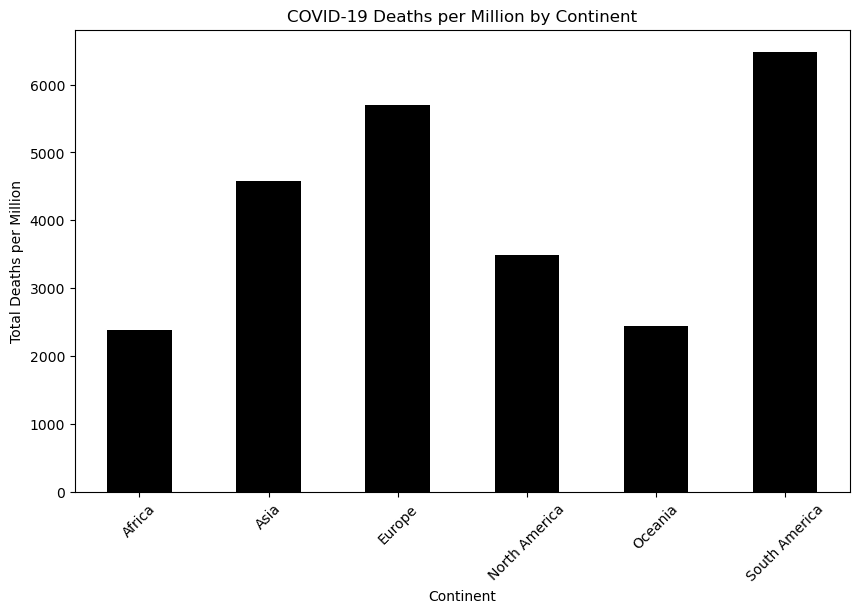

In [15]:
# Aggregate total deaths per million by continent
deaths_by_continent = pd.pivot_table(
    data=df,
    values='total_deaths_per_million',
    index='continent',  # Use continent as the index
    aggfunc='max'  # Summing up total deaths per million for each continent
)

# Display the pivot table to check the aggregation
deaths_by_continent

# Plotting the aggregated deaths by continent
deaths_by_continent.plot(kind='bar', figsize=(10, 6), legend=False, color='black')
plt.title('COVID-19 Deaths per Million by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths per Million')
plt.xticks(rotation=45)
plt.show()


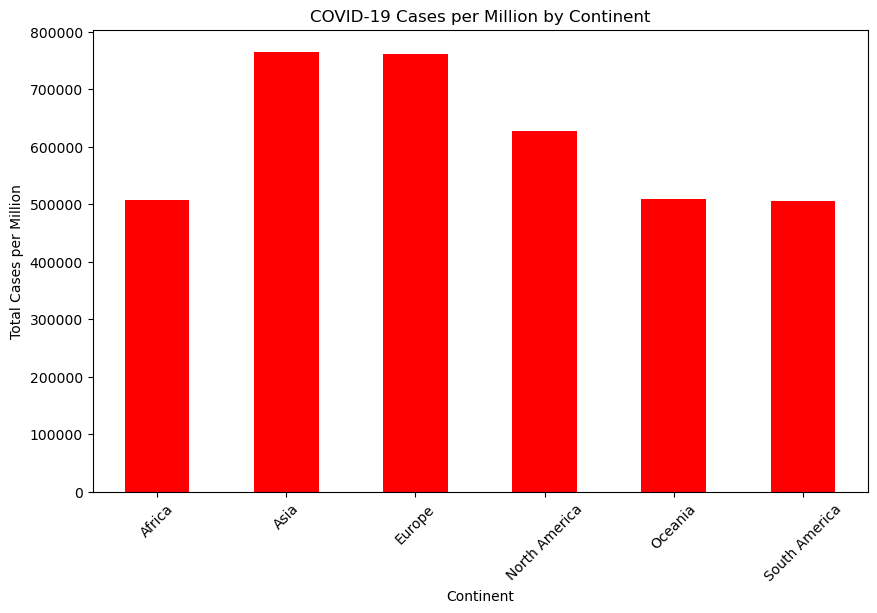

In [16]:
# Aggregate total deaths per million by continent
cases_by_continent = pd.pivot_table(
    data=df,
    values='total_cases_per_million',
    index='continent',  # Use continent as the index
    aggfunc='max'  # Summing up total deaths per million for each continent
)

# Display the pivot table to check the aggregation
deaths_by_continent

# Plotting the aggregated deaths by continent
cases_by_continent.plot(kind='bar', figsize=(10, 6), legend=False, color='r')
plt.title('COVID-19 Cases per Million by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases per Million')
plt.xticks(rotation=45)
plt.show()


In [17]:
df_filtered = df[df['date'].dt.year.isin([2020, 2021])]

# Adding 'month', 'year', and numeric 'month_num' columns for detailed grouping
df_filtered['month'] = df_filtered['date'].dt.month_name()
df_filtered['year'] = df_filtered['date'].dt.year
df_filtered['month_num'] = df_filtered['date'].dt.month

# Ensure the groupby operation considers the numeric month for proper sequence
grouped = df_filtered.groupby(['year', 'month_num', 'month', 'continent']).agg(
    total_cases=('total_cases', 'sum'),
    total_deaths=('total_deaths', 'sum')
).reset_index()

# Sort the results by 'year' and 'month_num' to ensure correct ordering
grouped = grouped.sort_values(by=['year', 'month_num'], ascending=[False, True])

# Optionally, drop 'month_num' if it's no longer needed for clarity in the final DataFrame
grouped.drop('month_num', axis=1, inplace=True)

grouped.head(50)


C:\Users\habib\AppData\Local\Temp\ipykernel_15032\1400731514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['date'].dt.month_name()
C:\Users\habib\AppData\Local\Temp\ipykernel_15032\1400731514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['date'].dt.year
C:\Users\habib\AppData\Local\Temp\ipykernel_15032\1400731514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,year,month,continent,total_cases,total_deaths
72,2021,January,Africa,96914974.00,2336024.00
73,2021,January,Asia,667747341.00,10878891.00
74,2021,January,Europe,820558523.00,20313420.00
75,2021,January,North America,806146356.00,18498398.00
76,2021,January,Oceania,1742015.00,37426.00
77,2021,January,South America,440361079.00,13738317.00
78,2021,February,Africa,104540173.00,2709105.00
79,2021,February,Asia,663611694.00,10704007.00
80,2021,February,Europe,887118754.00,22444006.00
81,2021,February,North America,875268570.00,20397997.00


In [18]:
def assign_season(row):
    # Northern Hemisphere seasons for Asia, North America, Europe
    northern_hemisphere = {
        'winter': ['December', 'January', 'February'],
        'summer': ['June', 'July', 'August'],
        'spring': ['March', 'April', 'May'],
        'fall': ['September', 'October', 'November']
    }
    
    # Southern Hemisphere seasons for Africa, Australia, South America
    southern_hemisphere = {
        'summer': ['December', 'January', 'February'],
        'winter': ['June', 'July', 'August'],
        'fall': ['March', 'April', 'May'],
        'spring': ['September', 'October', 'November']
    }
    
    # Assign seasons based on the continent and month
    if row['continent'] in ['Asia', 'North America', 'Europe']:
        for season, months in northern_hemisphere.items():
            if row['month'] in months:
                return season
    elif row['continent'] in ['Africa', 'Oceania', 'South America']:
        for season, months in southern_hemisphere.items():
            if row['month'] in months:
                return season
    else:
        return 'Season not defined'

# Applying the function to create a new 'season' column
df_filtered['season'] = df_filtered.apply(assign_season, axis=1)

df_filtered.head()

C:\Users\habib\AppData\Local\Temp\ipykernel_15032\3313759818.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['season'] = df_filtered.apply(assign_season, axis=1)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,month,year,month_num,season
0,AFG,Asia,Afghanistan,2020-01-05,0.00,0.00,0.00,0.00,0.00,0.00,...,0.51,41128772.00,0.00,0.00,0.00,0.00,January,2020,1,winter
1,AFG,Asia,Afghanistan,2020-01-06,0.00,0.00,0.00,0.00,0.00,0.00,...,0.51,41128772.00,0.00,0.00,0.00,0.00,January,2020,1,winter
2,AFG,Asia,Afghanistan,2020-01-07,0.00,0.00,0.00,0.00,0.00,0.00,...,0.51,41128772.00,0.00,0.00,0.00,0.00,January,2020,1,winter
3,AFG,Asia,Afghanistan,2020-01-08,0.00,0.00,0.00,0.00,0.00,0.00,...,0.51,41128772.00,0.00,0.00,0.00,0.00,January,2020,1,winter
4,AFG,Asia,Afghanistan,2020-01-09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.51,41128772.00,0.00,0.00,0.00,0.00,January,2020,1,winter


In [19]:
pivot_season_continent = pd.pivot_table(
    data=df_filtered,
    values=['total_cases', 'total_deaths'],
    index='continent',
    columns='season',
    aggfunc='sum'
).reset_index()

pivot_season_continent

continent   total_cases                                            \
season                         fall        spring        summer        winter   
0              Africa  406764254.00  915957175.00  559388223.00  625299945.00   
1                Asia 8094562495.00 3181700368.00 5712315390.00 4494880418.00   
2              Europe 6360315123.00 3841147841.00 4817401468.00 4766515292.00   
3       North America 5753100012.00 3368495072.00 4169671718.00 4119508980.00   
4             Oceania    6660674.00   29425469.00   18621081.00   10922329.00   
5       South America 2104936288.00 4250360217.00 2495951315.00 3377354013.00   

       total_deaths                                         
season         fall       spring       summer       winter  
0       10847895.00  23135506.00  13799872.00  16031433.00  
1      122776666.00  45709059.00  84283568.00  69505535.00  
2      142828252.00  98929007.00 124311189.00 104798297.00  
3      131281383.00  81376127.00 103863050.00  90648506.00  
4         123999.00    412302.00    256121.00    172958.00  
5       65805232.00 135207521.00  77069329.00 108754558.00

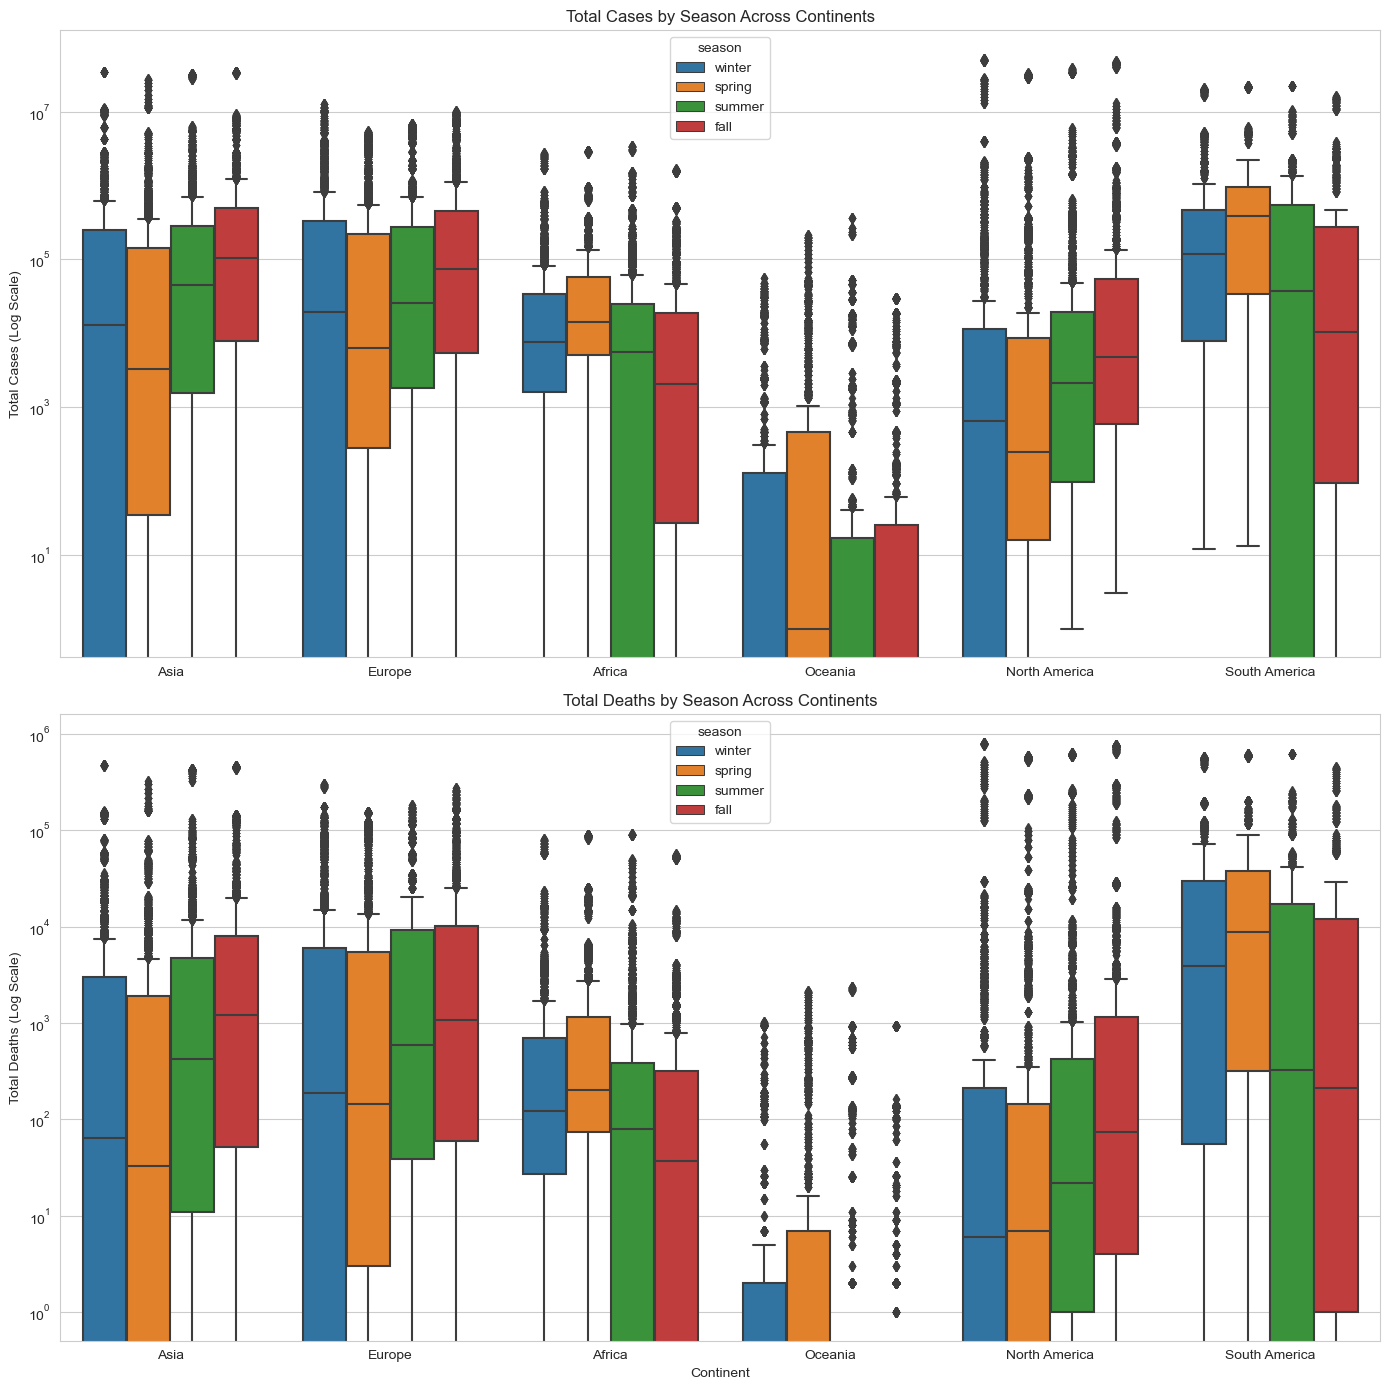

In [20]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots (horizontal or vertical layout as per your preference)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

# Box plot for Total Cases by Season Across Continents
sns.boxplot(data=df_filtered, x='continent', y='total_cases', hue='season', ax=axs[0])
axs[0].set_title('Total Cases by Season Across Continents')
axs[0].set_yscale('log')
axs[0].set_ylabel('Total Cases (Log Scale)')
axs[0].set_xlabel('')

# Box plot for Total Deaths by Season Across Continents
sns.boxplot(data=df_filtered, x='continent', y='total_deaths', hue='season', ax=axs[1])
axs[1].set_title('Total Deaths by Season Across Continents')
axs[1].set_yscale('log')
axs[1].set_ylabel('Total Deaths (Log Scale)')
axs[1].set_xlabel('Continent')

plt.tight_layout()
plt.show()

In [21]:
# Assuming 'continent' is the column name for continents in your DataFrame

# Get unique continent names
unique_continent_names = df['continent'].unique()

# Count of unique continents
unique_continents_count = len(unique_continent_names)

# Create a 2x2 table (as a DataFrame for better visualization)
summary_table = pd.DataFrame({
    'Metric': ['Countries', 'Continents'],
    'Unique Count': [unique_countries_count, unique_continents_count],
})

summary_table


NameError: name 'unique_countries_count' is not defined

In [23]:
print(df.shape)

(365388, 68)
